# ShakeMap Lookup
Lookup the intensity for a set of locations on a downloaded shakemap grid

In [1]:
# Shakemaps should be in xml or xml.zip format
IFILE_SHAKEMAP = "./Downloads/grid_70116556_v01.0.xml"
IFILE_SHAKEMAP_UNC = "./Downloads/uncertainty_70116556_v01.0.xml"

# Uncomment if no uncertainty
IFILE_SHAKEMAP_UNC = None

# Locations list as a csv file. 
IFILE_LOCATIONS = "../tests/example_lookup/Hawaii_Mile_Markers_v2.csv"
INTENSITY_MEASURE = "MMI"

In [2]:
import pandas as pd
from numpy import isnan
from shakemap_utils import USGSshakemapGrid

# Read the shakemap file(s)
thisSM = USGSshakemapGrid(IFILE_SHAKEMAP, 'MMI', ifile_unc=IFILE_SHAKEMAP_UNC)

# Read the locations
locns = pd.read_csv(IFILE_LOCATIONS)
   
# Look up the intensities
median, stddev = thisSM.lookup(locns['lon'].values, locns['lat'].values)
locns[INTENSITY_MEASURE] = median

if stddev[~isnan(stddev)].any():
    locns[f"std_{INTENSITY_MEASURE}"] = stddev

# Print top locations
locns.sort_values(INTENSITY_MEASURE, ascending=False).head(20)

Shakemap key details:
	 {http://www.w3.org/2001/XMLSchema-instance}schemaLocation : http://earthquake.usgs.gov http://earthquake.usgs.gov/eqcenter/shakemap/xml/schemas/shakemap.xsd
	 event_id : hv70116556
	 shakemap_id : hv70116556
	 shakemap_version : 1
	 code_version : 4.0.2+152.gf8cc092.dirty
	 process_timestamp : 2019-09-30T20:13:58
	 shakemap_originator : atlas
	 map_status : automatic
	 shakemap_event_type : ACTUAL


,id,lon,lat,tiv,island,route,location,MMI
961,962,-154.975613,19.362360,100,Hawaii,130,RIGHT,8.1
1137,1138,-154.962803,19.364295,100,Hawaii,137,RIGHT,7.8
960,961,-154.964702,19.371295,100,Hawaii,130,RIGHT,7.6
959,960,-154.958400,19.384390,100,Hawaii,130,RIGHT,7.4
958,959,-154.955780,19.398370,100,Hawaii,130,RIGHT,7.1
955,956,-154.952879,19.412453,100,Hawaii,130,RIGHT,6.8
1132,1133,-154.916114,19.401692,100,Hawaii,137,RIGHT,6.7
952,953,-154.948621,19.425690,100,Hawaii,130,RIGHT,6.6
1129,1130,-154.902470,19.409885,100,Hawaii,137,RIGHT,6.5
1122,1123,-154.880178,19.427259,100,Hawaii,137,RIGHT,6.5


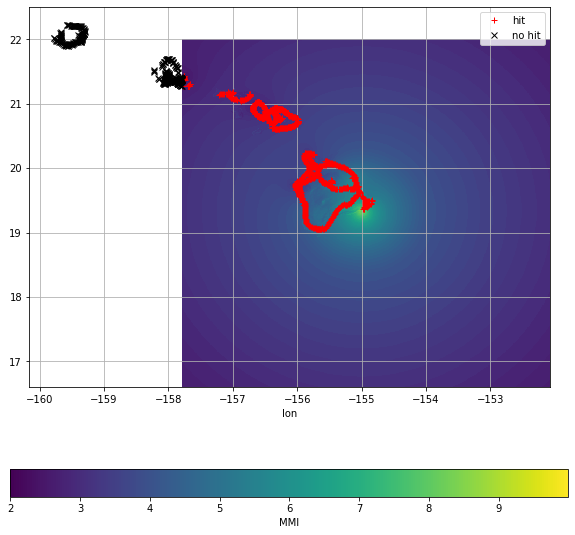

In [3]:
# Check plot to show what got a hit and what didn't
import matplotlib.pyplot as plt

%matplotlib inline

# Create the plot
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 10)

# Plot the shakemap as colours
cax = ax.imshow(thisSM.grid, aspect='equal', interpolation='none',
                vmin=2, vmax=10, origin='lower',
                extent=thisSM.xylims(False))

(locns.loc[locns[INTENSITY_MEASURE].notnull()]
 .plot('lon', 'lat', style='+r', label='hit', ax=ax))

(locns.loc[~locns[INTENSITY_MEASURE].notnull()]
 .plot('lon', 'lat', style='xk', label='no hit', ax=ax))
    
# Formatting
ax.grid()
plt.colorbar(cax, ax=ax, orientation='horizontal', ticks=range(0, 10, 1), label=thisSM.intensMeasure)
_ = 1

<IPython.core.display.Javascript object>


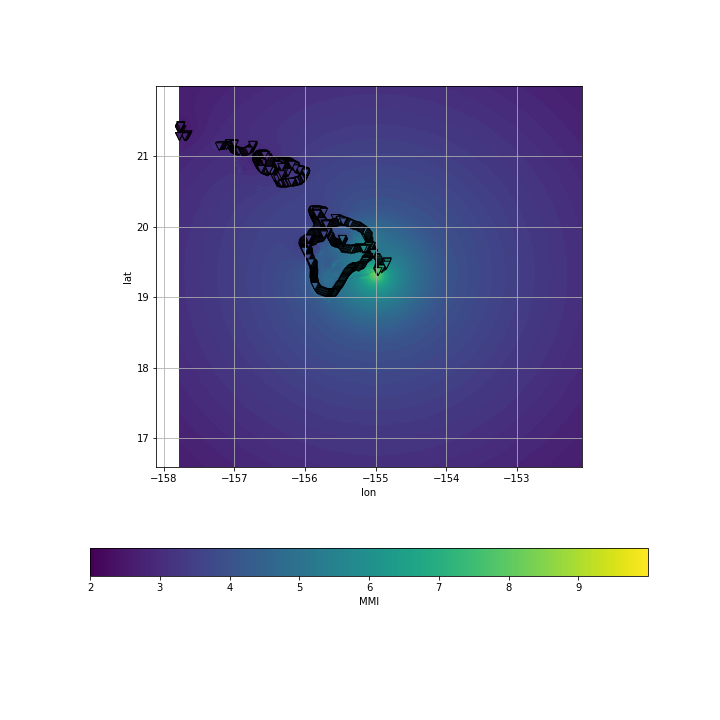

In [9]:
%matplotlib notebook

# Create the plot
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 10)

# Plot the shakemap as colours
cax = ax.imshow(thisSM.grid, aspect='equal', interpolation='none',
                vmin=2, vmax=10, origin='lower',
                extent=thisSM.xylims(False))

locns.plot.scatter('lon', 'lat', s=60.0, c=INTENSITY_MEASURE, 
                   colormap=cax.get_cmap(), vmin=2, vmax=10, 
                   marker='v', edgecolor='k', legend=False, colorbar=False, ax=ax)
# Formatting
ax.grid()
plt.colorbar(cax, ax=ax, orientation='horizontal', ticks=range(0, 10, 1), label=thisSM.intensMeasure)
_ = 1